In [ ]:
!pip install pomegranate
!pip install git+https://github.com/hayesall/bn-rule-extraction.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hayesall/bn-rule-extraction.git to /tmp/pip-req-build-_2oj0rmb
  Running command git clone --filter=blob:none --quiet https://github.com/hayesall/bn-rule-extraction.git /tmp/pip-req-build-_2oj0rmb
  Resolved https://github.com/hayesall/bn-rule-extraction.git to commit 137fb3a0a84c1dbee69f119cd55cf70ee01cac83
  Preparing metadata (setup.py) ... done


In [ ]:
!apt install libgraphviz-dev
!pip install matplotlib pygraphviz wandb -qqq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pip install umap-learn scikit-tda python-igraph plotly ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_rule_extraction import ordinal_encode, print_rules
from pomegranate import BayesianNetwork

from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer, MinMaxScaler

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from sklearn.metrics import classification_report, matthews_corrcoef, balanced_accuracy_score, accuracy_score

from pandas_profiling import ProfileReport

import pandas as pd
import numpy as np
import seaborn as sns

import umap
import plotly.graph_objects as go
import plotly.express as px

import kmapper as km
from kmapper.plotlyviz import *
from ipywidgets import (HBox, VBox)

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Irini/NEW"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset into memory

# df_processed = pd.read_csv(f"{path}/NEW_v00_.csv")

df = pd.read_csv(f"{path}/NEW_v00_imputed_SMOTE.csv")
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file(f"{path}/data_report_NEW_v00_imputed_SMOTE.html")

df_original = pd.read_excel(f"{path}/NEW_v00.xlsx")

# df.dropna(inplace=True)
print(df.shape)
df.head()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

(1682, 22)


,NMs,Coating,Crystallinity_%,Aver_crystallite_sizes_nm,Core_size_nm_TEM,Spherical_surface_Area_nm^2 _TEM,Na 1s_Concent_%,O 1s_Concent_%,Ag 3d_Concent_%,C 1s_Concent_%,...,PI_t0,Hydro_size_t24_nm,PI_t24,Exposure dose_PPM,Organ,Cell_line,multiwell,Assay,viability_%,viability
0,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.38,113.96667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,2.99,very_toxic
1,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.38,113.96667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,3.06,very_toxic
2,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.38,113.96667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,3.09,very_toxic
3,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.42,250.53334,0.4,50.0,Lung,A549,MW6,Alamar_Blue,3.11,very_toxic
4,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.42,250.53334,0.4,50.0,Lung,A549,MW6,Alamar_Blue,3.13,very_toxic


In [ ]:
df_original.head()

,NMs,Coating,Crystallinity_%,Aver_crystallite_sizes_nm,Core_size_nm_TEM,Spherical_surface_Area_nm^2 _TEM,Na 1s_Concent_%,O 1s_Concent_%,Ag 3d_Concent_%,C 1s_Concent_%,...,PI_t0,Hydro_size_t24_nm,PI_t24,Exposure dose_PPM,Organ,Cell_line,multiwell,Assay,viability_%,viability
0,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,NaN,0.0,34.02,0.17,64.51,...,0.38,113.966667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,2.99,very_toxic
1,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,NaN,0.0,34.02,0.17,64.51,...,0.38,113.966667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,3.06,very_toxic
2,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,NaN,0.0,34.02,0.17,64.51,...,0.38,113.966667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,3.09,very_toxic
3,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,NaN,0.0,34.02,0.17,64.51,...,0.42,250.533333,0.4,50.0,Lung,A549,MW6,Alamar_Blue,3.11,very_toxic
4,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,NaN,0.0,34.02,0.17,64.51,...,0.42,250.533333,0.4,50.0,Lung,A549,MW6,Alamar_Blue,3.13,very_toxic


In [ ]:
df_viability = df["viability"].copy()
df_pre_encoding = df.copy()

df = pd.get_dummies(df.drop(columns=["viability", "NMs", "multiwell", "Organ"]), columns=["Coating",
                                                                                          "Cell_line",
                                                                                          "Assay"])
df["viability"] = df_viability

In [ ]:
df.columns

Index(['Crystallinity_%', 'Aver_crystallite_sizes_nm', 'Core_size_nm_TEM',
       'Spherical_surface_Area_nm^2 _TEM', 'Na 1s_Concent_%', 'O 1s_Concent_%',
       'Ag 3d_Concent_%', 'C 1s_Concent_%', 'N 1s_Concent_%',
       'Hydro_size_t0_nm', 'PI_t0', 'Hydro_size_t24_nm', 'PI_t24',
       'Exposure dose_PPM', 'viability_%', 'Coating_CUR', 'Coating_HEC',
       'Coating_PVP', 'Coating_none', 'Cell_line_A549', 'Cell_line_HCT-116',
       'Assay_Alamar_Blue', 'Assay_MTT', 'Assay_WST-1', 'viability'],
      dtype='object')

In [ ]:
df_original.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NMs                               899 non-null    object 
 1   Coating                           899 non-null    object 
 2   Crystallinity_%                   899 non-null    float64
 3   Aver_crystallite_sizes_nm         899 non-null    float64
 4   Core_size_nm_TEM                  899 non-null    float64
 5   Spherical_surface_Area_nm^2 _TEM  725 non-null    float64
 6   Na 1s_Concent_%                   899 non-null    float64
 7   O 1s_Concent_%                    899 non-null    float64
 8   Ag 3d_Concent_%                   899 non-null    float64
 9   C 1s_Concent_%                    899 non-null    float64
 10  N 1s_Concent_%                    899 non-null    float64
 11  Hydro_size_t0_nm                  470 non-null    float64
 12  PI_t0   

<ipython-input-11-d0832c4be001>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_original.info(null_counts=True)


In [ ]:
df.drop(columns=["viability"], inplace=True)

In [ ]:
mapper = umap.UMAP(n_components=3,
                   metric="correlation")

embedding = mapper.fit_transform(df.drop(columns=["viability_%"]))

In [ ]:
embedding = pd.DataFrame(embedding, columns=["x", "y", "z"])
embedding["viability_%"] = df["viability_%"]
embedding

,x,y,z,viability_%
0,10.404787,-0.588998,-12.600884,2.990000
1,10.452702,-0.558619,-12.648782,3.060000
2,10.427423,-0.581245,-12.623481,3.090000
3,-4.481059,15.184980,-8.951628,3.110000
4,-4.480638,15.185934,-8.950087,3.130000
...,...,...,...,...
1677,-13.461872,-10.982066,9.926064,3.161164
1678,-3.969957,14.376533,8.119069,5.538567
1679,17.668482,-2.831528,15.813195,1.981140
1680,17.540865,-2.732183,15.930140,10.956768


In [ ]:
scaler = MinMaxScaler()
embedding["viability_%"] = scaler.fit_transform(embedding["viability_%"].to_numpy().reshape(-1, 1))

In [ ]:
fig = px.scatter_3d(embedding,
                    x="x", y="y", z="z", 
                    color="viability_%",
                    color_continuous_scale="Viridis")

fig.update_traces(marker={'size': 4})
fig.write_html(f"{path}/umap_maifold_projection.html")
fig

# Keppler

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

data = df.to_numpy()

# Fit to and transform the data
projected_data = mapper.fit_transform(data,
                                      projection=[umap.UMAP(n_components=3,
                                                             metric="correlation")])

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data,
                   data,
                   clusterer=OPTICS(),
                   cover=km.Cover(n_cubes=20, perc_overlap=0.6))

color_values = df["viability_%"].to_numpy()

kmgraph,  mapper_summary, colorf_distribution = get_mapper_graph(graph,
                                                                 color_values,
                                                                 color_function_name='Viability %')

# Visualize it
mapper.visualize(graph, path_html="keplermapper_output.html",
                 title="Topological network representing Toxicity Dataset")

In [ ]:
plotly_graph_data = plotly_graph(kmgraph, graph_layout='fr',
                                 factor_size=1.5, edge_linewidth=0.5)

layout = plot_layout(title='Topological network representing Toxicity Dataset',
                     width=620, height=570,
                     annotation_text=get_kmgraph_meta(mapper_summary),)

fw_graph = go.FigureWidget(data=plotly_graph_data, layout=layout)
fw_hist = node_hist_fig(colorf_distribution,)
fw_summary = summary_fig(mapper_summary, height=300)
dashboard = hovering_widgets(kmgraph,
                             fw_graph,
                             member_textbox_width=600)

#Update the fw_graph colorbar, setting its title:

fw_graph.data[1].marker.colorbar.title = 'dist to<br>x-min'

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
fw_graph

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width':…

In [ ]:
fw_graph.write_html(f"{path}/Topological Network reresenting Toxicity Dataset.html")

In [ ]:
fw_summary

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'mode': 'text',
              'text': [<br><b>…

In [ ]:
fw_hist

FigureWidget({
    'data': [{'hoverinfo': 'y+text',
              'marker': {'color': [rgb(70, 18, 100), rgb(6…

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# BN

In [ ]:
df = df_pre_encoding.copy()

In [ ]:
df.dtypes

NMs                                  object
Coating                              object
Crystallinity_%                     float64
Aver_crystallite_sizes_nm           float64
Core_size_nm_TEM                    float64
Spherical_surface_Area_nm^2 _TEM    float64
Na 1s_Concent_%                     float64
O 1s_Concent_%                      float64
Ag 3d_Concent_%                     float64
C 1s_Concent_%                      float64
N 1s_Concent_%                      float64
Hydro_size_t0_nm                    float64
PI_t0                               float64
Hydro_size_t24_nm                   float64
PI_t24                              float64
Exposure dose_PPM                   float64
Organ                                object
Cell_line                            object
multiwell                            object
Assay                                object
viability_%                         float64
viability                            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NMs                               1682 non-null   object 
 1   Coating                           1682 non-null   object 
 2   Crystallinity_%                   1682 non-null   float64
 3   Aver_crystallite_sizes_nm         1682 non-null   float64
 4   Core_size_nm_TEM                  1682 non-null   float64
 5   Spherical_surface_Area_nm^2 _TEM  1682 non-null   float64
 6   Na 1s_Concent_%                   1682 non-null   float64
 7   O 1s_Concent_%                    1682 non-null   float64
 8   Ag 3d_Concent_%                   1682 non-null   float64
 9   C 1s_Concent_%                    1682 non-null   float64
 10  N 1s_Concent_%                    1682 non-null   float64
 11  Hydro_size_t0_nm                  1682 non-null   float64
 12  PI_t0 

In [ ]:
df["Na 1s_Concent_%"].value_counts()

0.000000    1198
7.510000     348
4.110000     134
5.219059       1
2.045201       1
Name: Na 1s_Concent_%, dtype: int64

In [ ]:
df["N 1s_Concent_%"].value_counts()

0.000000    1471
2.320000     134
1.300000      57
5.190000      18
0.332820       1
0.854124       1
Name: N 1s_Concent_%, dtype: int64

In [ ]:
# Na 1s_Concent_% is very sparse and cannot be used, so we drop it out

df.drop(columns=["viability_%", "NMs", "Organ", "multiwell", "N 1s_Concent_%", "Na 1s_Concent_%"], inplace=True)
df["viability"] = df_viability

In [ ]:
df.columns

Index(['Coating', 'Crystallinity_%', 'Aver_crystallite_sizes_nm',
       'Core_size_nm_TEM', 'Spherical_surface_Area_nm^2 _TEM',
       'O 1s_Concent_%', 'Ag 3d_Concent_%', 'C 1s_Concent_%',
       'Hydro_size_t0_nm', 'PI_t0', 'Hydro_size_t24_nm', 'PI_t24',
       'Exposure dose_PPM', 'Cell_line', 'Assay', 'viability'],
      dtype='object')

In [ ]:
df.head()

,Coating,Crystallinity_%,Aver_crystallite_sizes_nm,Core_size_nm_TEM,Spherical_surface_Area_nm^2 _TEM,O 1s_Concent_%,Ag 3d_Concent_%,C 1s_Concent_%,Hydro_size_t0_nm,PI_t0,Hydro_size_t24_nm,PI_t24,Exposure dose_PPM,Cell_line,Assay,viability
0,HEC,59.9,75.0,14.0,3981.5999,34.02,0.17,64.51,254.33,0.38,113.96667,0.5,100.0,A549,Alamar_Blue,very_toxic
1,HEC,59.9,75.0,14.0,3981.5999,34.02,0.17,64.51,254.33,0.38,113.96667,0.5,100.0,A549,Alamar_Blue,very_toxic
2,HEC,59.9,75.0,14.0,3981.5999,34.02,0.17,64.51,254.33,0.38,113.96667,0.5,100.0,A549,Alamar_Blue,very_toxic
3,HEC,59.9,75.0,14.0,3981.5999,34.02,0.17,64.51,173.53,0.42,250.53334,0.4,50.0,A549,Alamar_Blue,very_toxic
4,HEC,59.9,75.0,14.0,3981.5999,34.02,0.17,64.51,173.53,0.42,250.53334,0.4,50.0,A549,Alamar_Blue,very_toxic


In [ ]:
numeric_features = ['Crystallinity_%', 
                    'Aver_crystallite_sizes_nm',
                    # 'Core_size_nm_TEM',
                    # 'Spherical_surface_Area_nm^2 _TEM',
                    # 'O 1s_Concent_%', 
                    # 'Ag 3d_Concent_%',
                    # 'C 1s_Concent_%', 
                    'Hydro_size_t0_nm',
                    'PI_t0',
                    'Hydro_size_t24_nm',
                    'PI_t24', 
                    'Exposure dose_PPM',
                    ]

In [ ]:
def re_map(label, col):
  thresholds_low_to_high = sorted(list(cats[col].values()))

  if label == "Low":
    next_label = "Medium"
  
  if label == "Medium":
    next_label = "High"

  if label == "High":
    next_label = None

  threshold_this = cats[col][label]

  if next_label is not None:
    threshold_next = cats[col][next_label]
    remapped = f"{label} ({threshold_this} -> {threshold_next})"
  
  else:
    remapped = f"{label} (> {threshold_this})"

  return remapped

labels = ["Low", "Medium", "High"]

cats = {}
for feature in numeric_features:
  categories, bins = pd.qcut(df[feature], q=len(labels), labels=labels, retbins=True)

  cats[feature] = dict()
  for label, bin in zip(labels, bins):
    cats[feature][label] = bin

  df[feature] = categories.apply(re_map, args=(feature,))

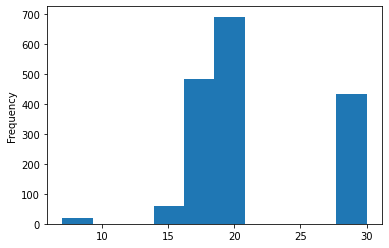

In [ ]:
df["Core_size_nm_TEM"].plot(kind="hist")

In [ ]:
# run for some features separately -> need to manually adjust bins
categories, bins = pd.qcut(df["Core_size_nm_TEM"], q=[0.001, 0.25, 0.5, 0.99], labels=labels, retbins=True)
cats["Core_size_nm_TEM"] = dict()
for label, bin in zip(labels, bins):
    cats["Core_size_nm_TEM"][label] = bin
df["Core_size_nm_TEM"] = categories.apply(re_map, args=("Core_size_nm_TEM",))
df["Core_size_nm_TEM"].value_counts()

Medium (17.8 -> 20.0)    691
Low (7.0 -> 17.8)        559
High (> 20.0)            432
Name: Core_size_nm_TEM, dtype: int64

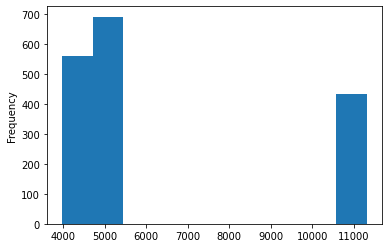

In [ ]:
df["Spherical_surface_Area_nm^2 _TEM"].plot(kind="hist")

In [ ]:
# run for some features separately -> need to manually adjust bins
categories, bins = pd.qcut(df["Spherical_surface_Area_nm^2 _TEM"], q=[0.01, 0.2, 0.5, 0.99], labels=labels, retbins=True)
cats["Spherical_surface_Area_nm^2 _TEM"] = dict()
for label, bin in zip(labels, bins):
    cats["Spherical_surface_Area_nm^2 _TEM"][label] = bin
df["Spherical_surface_Area_nm^2 _TEM"] = categories.apply(re_map, args=("Spherical_surface_Area_nm^2 _TEM",))
df["Spherical_surface_Area_nm^2 _TEM"].value_counts()

Medium (3981.5944832 -> 5026.55)    913
High (> 5026.55)                    432
Low (3981.53 -> 3981.5944832)       337
Name: Spherical_surface_Area_nm^2 _TEM, dtype: int64

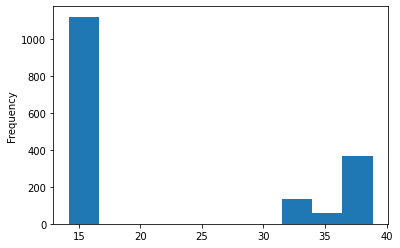

In [ ]:
df["O 1s_Concent_%"].plot(kind="hist")

In [ ]:
df["O 1s_Concent_%"].value_counts()

14.540000    691
14.160000    432
38.190000    348
31.550000    134
34.020000     57
38.890000     18
37.377800      1
36.575061      1
Name: O 1s_Concent_%, dtype: int64

In [ ]:
# run for some features separately -> need to manually adjust bins
categories, bins = pd.qcut(df["O 1s_Concent_%"], q=[0.0, 0.5, 0.75, 0.99], labels=labels, retbins=True)
cats["O 1s_Concent_%"] = dict()
for label, bin in zip(labels, bins):
    cats["O 1s_Concent_%"][label] = bin
df["O 1s_Concent_%"] = categories.apply(re_map, args=("O 1s_Concent_%",))
df["O 1s_Concent_%"].value_counts()

Low (14.16 -> 14.54)       1123
High (> 34.02)              368
Medium (14.54 -> 34.02)     191
Name: O 1s_Concent_%, dtype: int64

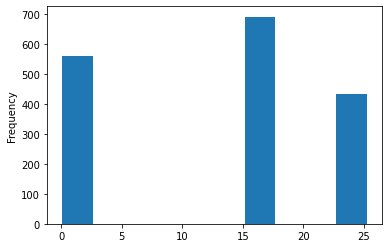

In [ ]:
df["Ag 3d_Concent_%"].plot(kind="hist")

In [ ]:
# run for some features separately -> need to manually adjust bins
categories, bins = pd.qcut(df["Ag 3d_Concent_%"], q=[0.0, 0.25, 0.5, 0.99], labels=labels, retbins=True)
cats["Ag 3d_Concent_%"] = dict()
for label, bin in zip(labels, bins):
    cats["Ag 3d_Concent_%"][label] = bin
df["Ag 3d_Concent_%"] = categories.apply(re_map, args=("Ag 3d_Concent_%",))
df["Ag 3d_Concent_%"].value_counts()

Medium (0.19 -> 15.53)    709
Low (0.08 -> 0.19)        541
High (> 15.53)            432
Name: Ag 3d_Concent_%, dtype: int64

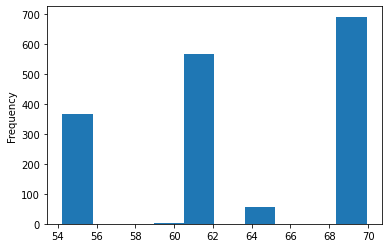

In [ ]:
df["C 1s_Concent_%"].plot(kind="hist")

In [ ]:
# run for some features separately -> need to manually adjust bins
categories, bins = pd.qcut(df["C 1s_Concent_%"], q=[0.0, 0.25, 0.5, 0.99], labels=labels, retbins=True)
cats["C 1s_Concent_%"] = dict()
for label, bin in zip(labels, bins):
    cats["C 1s_Concent_%"][label] = bin
df["C 1s_Concent_%"] = categories.apply(re_map, args=("C 1s_Concent_%",))
df["C 1s_Concent_%"].value_counts()

Low (54.23 -> 60.61)       800
High (> 61.83)             748
Medium (60.61 -> 61.83)    134
Name: C 1s_Concent_%, dtype: int64

In [ ]:
cats

{'Crystallinity_%': {'Low': 22.9, 'Medium': 60.0, 'High': 61.0},
 'Aver_crystallite_sizes_nm': {'Low': 46.0, 'Medium': 98.0, 'High': 177.0},
 'Hydro_size_t0_nm': {'Low': 55.91,
  'Medium': 209.97141366666617,
  'High': 363.31595},
 'PI_t0': {'Low': 0.18, 'Medium': 0.47, 'High': 0.5969939999999999},
 'Hydro_size_t24_nm': {'Low': 63.744446,
  'Medium': 149.34585899999996,
  'High': 266.90552},
 'PI_t24': {'Low': 0.04, 'Medium': 0.2822396666666666, 'High': 0.499763},
 'Exposure dose_PPM': {'Low': 0.0, 'Medium': 20.0, 'High': 58.353558999999976},
 'Core_size_nm_TEM': {'Low': 7.0, 'Medium': 17.8, 'High': 20.0},
 'Spherical_surface_Area_nm^2 _TEM': {'Low': 3981.53,
  'Medium': 3981.5944832,
  'High': 5026.55},
 'O 1s_Concent_%': {'Low': 14.16, 'Medium': 14.54, 'High': 34.02},
 'Ag 3d_Concent_%': {'Low': 0.08, 'Medium': 0.19, 'High': 15.53},
 'C 1s_Concent_%': {'Low': 54.23, 'Medium': 60.61, 'High': 61.83}}

In [ ]:
df = df.astype(object)
df = df.fillna("Unknown")

In [ ]:
df.dtypes

Coating                             object
Crystallinity_%                     object
Aver_crystallite_sizes_nm           object
Core_size_nm_TEM                    object
Spherical_surface_Area_nm^2 _TEM    object
O 1s_Concent_%                      object
Ag 3d_Concent_%                     object
C 1s_Concent_%                      object
Hydro_size_t0_nm                    object
PI_t0                               object
Hydro_size_t24_nm                   object
PI_t24                              object
Exposure dose_PPM                   object
Cell_line                           object
Assay                               object
viability                           object
dtype: object

In [ ]:
df.shape

(1682, 16)

In [ ]:
df.to_csv(f"{path}/df_binned.csv", index=True)

In [ ]:
df.columns

Index(['Coating', 'Crystallinity_%', 'Aver_crystallite_sizes_nm',
       'Core_size_nm_TEM', 'Spherical_surface_Area_nm^2 _TEM',
       'O 1s_Concent_%', 'Ag 3d_Concent_%', 'C 1s_Concent_%',
       'Hydro_size_t0_nm', 'PI_t0', 'Hydro_size_t24_nm', 'PI_t24',
       'Exposure dose_PPM', 'Cell_line', 'Assay', 'viability'],
      dtype='object')

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file(f"{path}/data_report_binned.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# df.drop_duplicates(inplace=True)
# df.reset_index(drop=True, inplace=True)

num_test_samples = round(0.2*df.shape[0])
print(num_test_samples)

336


In [ ]:
df_test = df.sample(num_test_samples)
df_train = df.loc[~df.index.isin(df_test.index)]

print(f"Total Samples: {df.shape[0]}\n"
      f"Train Samples: {df_train.shape[0]}\n"
      f"Test Samples: {df_test.shape[0]} ({100*df_test.shape[0]/df.shape[0]:0.2f}%)")

Total Samples: 1682
Train Samples: 1346
Test Samples: 336 (19.98%)


In [ ]:
encoded, mapping = ordinal_encode(df.columns, df)

encoded

array([[1., 1., 1., ..., 0., 0., 2.],
       [1., 1., 1., ..., 0., 0., 2.],
       [1., 1., 1., ..., 0., 0., 2.],
       ...,
       [3., 2., 1., ..., 1., 2., 2.],
       [3., 2., 1., ..., 1., 2., 2.],
       [3., 2., 1., ..., 0., 0., 2.]], dtype=float32)

In [ ]:
encoded_train = encoded[list(df_train.index)]
encoded_test = encoded[list(df_test.index)]

In [ ]:
# bn_algorithm = "chow-liu"
# bn_algorithm = "greedy"
bn_algorithm = "exact"

max_parents = 3

In [ ]:
def get_metrics(y_true, y_pred):

  print(classification_report(y_true, y_pred))

  for label in pd.unique(y_true):
    yt = y_true[y_true == label]
    yp = y_pred[y_pred.index.isin(yt.index)] 
    print("\n", label)
    print(f"Acc: {accuracy_score(yt, yp):0.4f}\n"
          f"Acc (balanced): {balanced_accuracy_score(yt, yp):0.4f}")

  print(f"\nMCC: {matthews_corrcoef(y_true, y_pred)}\n\n")


# Unconstrained BN

/usr/local/lib/python3.8/dist-packages/bayes_rule_extraction/bayes_rule_extraction.py:88: RuntimeWarning:

divide by zero encountered in double_scalars



Probabilities:
- Crystallinity_%
  P( Crystallinity_% = High (> 61.0) ) = 0.08
  P( Crystallinity_% = Low (22.9 -> 60.0) ) = 0.50
  P( Crystallinity_% = Medium (60.0 -> 61.0) ) = 0.42

IF (Core_size_nm_TEM = High (> 20.0)) THEN (Coating = PVP)
	CF = inf
IF (Core_size_nm_TEM = Low (7.0 -> 17.8)) THEN (Coating = HEC)
	CF = 26.75
IF (Core_size_nm_TEM = Medium (17.8 -> 20.0)) THEN (Coating = none)
	CF = inf
IF (C 1s_Concent_% = High (> 61.83)) THEN (Aver_crystallite_sizes_nm = Low (46.0 -> 98.0))
	CF = inf
IF (C 1s_Concent_% = Low (54.23 -> 60.61)) THEN (Aver_crystallite_sizes_nm = Medium (98.0 -> 177.0))
	CF = 1.14
IF (C 1s_Concent_% = Medium (60.61 -> 61.83)) THEN (Aver_crystallite_sizes_nm = High (> 177.0))
	CF = inf
IF (Crystallinity_% = High (> 61.0) ^ Aver_crystallite_sizes_nm = High (> 177.0)) THEN (Core_size_nm_TEM = Low (7.0 -> 17.8))
	CF = inf
IF (Crystallinity_% = Low (22.9 -> 60.0) ^ Aver_crystallite_sizes_nm = Low (46.0 -> 98.0)) THEN (Core_size_nm_TEM = Low (7.0 -> 17.8))
	CF

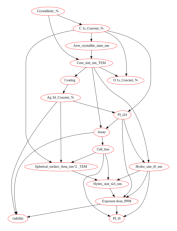

In [ ]:
unconstrained_model = BayesianNetwork().from_samples(
    encoded_train,
    algorithm=bn_algorithm,
    state_names=df.columns,
    max_parents=max_parents,
)

unconstrained_model.plot()
print_rules(unconstrained_model, df.columns, mapping)

              precision    recall  f1-score   support

       Toxic       0.74      0.58      0.65       105
        safe       0.71      0.79      0.75       112
  very_toxic       0.79      0.87      0.83       119

    accuracy                           0.75       336
   macro avg       0.75      0.74      0.74       336
weighted avg       0.75      0.75      0.75       336


 Toxic
Acc: 0.5810
Acc (balanced): 0.5810

 safe
Acc: 0.7857
Acc (balanced): 0.7857

 very_toxic
Acc: 0.8655
Acc (balanced): 0.8655

MCC: 0.6266613248355076




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



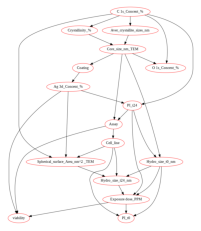

In [ ]:
unconstrained_model = BayesianNetwork().from_samples(
  df_train,
  algorithm=bn_algorithm,
  state_names=df.columns,
  max_parents=max_parents)

test_df = df_test.copy()
df_test.reset_index(drop=True, inplace=True)

test_df["viability"] = None  # configure to predict viability in network
test_df.reset_index(drop=True, inplace=True)

predictions = unconstrained_model.predict(test_df.values.tolist())

prediction_probabilities = unconstrained_model.probability(predictions)

predicted_df = pd.DataFrame(predictions)
predicted_df.columns = df.columns
predicted_df["probability"] = prediction_probabilities

y_pred = predicted_df["viability"]
y_true = df_test["viability"]

get_metrics(y_true, y_pred)

unconstrained_model.plot(f"{path}/BN_structure_unconstrained.pdf")
unconstrained_model.plot()

# Constrained BN

In [ ]:
feature_list = [(i, f) for i, f in enumerate(df.columns)]
feature_list

[(0, 'Coating'),
 (1, 'Crystallinity_%'),
 (2, 'Aver_crystallite_sizes_nm'),
 (3, 'Core_size_nm_TEM'),
 (4, 'Spherical_surface_Area_nm^2 _TEM'),
 (5, 'O 1s_Concent_%'),
 (6, 'Ag 3d_Concent_%'),
 (7, 'C 1s_Concent_%'),
 (8, 'Hydro_size_t0_nm'),
 (9, 'PI_t0'),
 (10, 'Hydro_size_t24_nm'),
 (11, 'PI_t24'),
 (12, 'Exposure dose_PPM'),
 (13, 'Cell_line'),
 (14, 'Assay'),
 (15, 'viability')]

In [ ]:
parents = [i for i, n in feature_list if n != "viability"]
parents

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
final_idx = 0
for idx, name in feature_list:
  if name == "viability":
    final_idx = idx

excluded_edges = [tuple([final_idx, i]) for i in parents]  # first set up that viability is always a final node

exposure_dose_idx = 12
skip_idxs = []
excluded_edges.extend([tuple([i, exposure_dose_idx]) for i in parents if i not in skip_idxs])

idx = 0
skip_idxs = []
excluded_edges.extend([tuple([i, idx]) for i in parents if i not in skip_idxs])

idx = 13
skip_idxs = []
excluded_edges.extend([tuple([i, idx]) for i in parents if i not in skip_idxs])

unconnected_features = [
                        # ("Ag 3d_Concent_%", "Aver_crystallite_sizes_nm"),
                        # ("Ag 3d_Concent_%", "Hydro_size_t24_nm"),
                        # ("C 1s_Concent_%", "Aver_crystallite_sizes_nm"),
                        ("Core_size_nm_TEM", "C 1s_Concent_%"),
                        ("PI_t24", "Hydro_size_t0_nm"),
                        ("Spherical_surface_Area_nm^2 _TEM", "PI_t24"),
                        ("Spherical_surface_Area_nm^2 _TEM", "C 1s_Concent_%"),
                        ("Spherical_surface_Area_nm^2 _TEM", "O 1s_Concent_%"),
                        ("Spherical_surface_Area_nm^2 _TEM", "PI_t24"),
                        ("Exposure dose_PPM", "PI_t0"),
                        ("Exposure dose_PPM", "PI_t24"),
                        ("Assay", "C 1s_Concent_%"),
                        ("PI_t24", "PI_t0"),
                        ("PI_t24", "O 1s_Concent_%"),
                        ("PI_t0", "O 1s_Concent_%"),
                        ("Cell_line", "Ag 3d_Concent_%"),
                        ("Cell_line", "C 1s_Concent_%"),
                        ("Cell_line", "O 1s_Concent_%"),
                        ("Cell_line", "Spherical_surface_Area_nm^2 _TEM")
                        ]

# unconnected_features = []
for pair in unconnected_features:
  start_idx, start_name = [item for item in feature_list if item[1] == pair[0]][0]
  end_idx, end_name = [item for item in feature_list if item[1] == pair[1]][0]

  edge = (start_idx, end_idx)
  excluded_edges.append(edge)

In [ ]:
connected_features = [
                      ("Assay", "viability"),
                      ("Ag 3d_Concent_%", "Core_size_nm_TEM"),
                      ("Ag 3d_Concent_%", "viability"),
                      ("C 1s_Concent_%", "Core_size_nm_TEM"),
                      ("C 1s_Concent_%", "Aver_crystallite_sizes_nm"),
                      ("Coating", "Spherical_surface_Area_nm^2 _TEM"),
                      ("Core_size_nm_TEM", "Aver_crystallite_sizes_nm"),
                      ("Core_size_nm_TEM", "Crystallinity_%"),
                      ("Core_size_nm_TEM", "Spherical_surface_Area_nm^2 _TEM"),
                      ("Aver_crystallite_sizes_nm", "Crystallinity_%"),
                      ("Crystallinity_%", "viability"),
                      ("Spherical_surface_Area_nm^2 _TEM", "viability"),
                      ("O 1s_Concent_%", "Core_size_nm_TEM"),
                      ("O 1s_Concent_%", "Aver_crystallite_sizes_nm"),
                      ("Core_size_nm_TEM", "viability"),
                      ("PI_t24", "Hydro_size_t24_nm"),
                      ("PI_t0", "Hydro_size_t0_nm"),
                      ("Hydro_size_t0_nm", "Hydro_size_t24_nm"),
                      ("Hydro_size_t24_nm", "viability"),
                      ("Cell_line", "PI_t0"),
                      ("Cell_line", "PI_t24"),
                      ("Cell_line", "Hydro_size_t24_nm"),
                      ("Cell_line", "Hydro_size_t0_nm"),
                      ("Cell_line", "Assay"),
                      ("Exposure dose_PPM", "viability"),
                      ]

# connected_features = []
included_edges = []
for pair in connected_features:
  start_idx, start_name = [item for item in feature_list if item[1] == pair[0]][0]
  end_idx, end_name = [item for item in feature_list if item[1] == pair[1]][0]

  edge = (start_idx, end_idx)
  included_edges.append(edge)

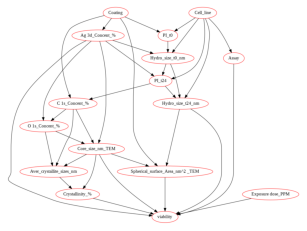

In [ ]:
# first we train the BN on encoded data so we can extract rules

constrained_model = BayesianNetwork().from_samples(
    encoded_train,
    algorithm=bn_algorithm,
    exclude_edges=excluded_edges,
    include_edges=included_edges,
    state_names=df.columns,
    max_parents=max_parents,
)

constrained_model.plot()

In [ ]:
print_rules(constrained_model, df.columns, mapping)

Probabilities:
- Coating
  P( Coating = CUR ) = 0.01
  P( Coating = HEC ) = 0.32
  P( Coating = PVP ) = 0.25
  P( Coating = none ) = 0.42
- Exposure dose_PPM
  P( Exposure dose_PPM = High (> 58.353558999999976) ) = 0.33
  P( Exposure dose_PPM = Low (0.0 -> 20.0) ) = 0.37
  P( Exposure dose_PPM = Medium (20.0 -> 58.353558999999976) ) = 0.30
- Cell_line
  P( Cell_line = A549 ) = 0.53
  P( Cell_line = HCT-116 ) = 0.47

IF (Aver_crystallite_sizes_nm = High (> 177.0) ^ Core_size_nm_TEM = Low (7.0 -> 17.8)) THEN (Crystallinity_% = High (> 61.0))
	CF = inf
IF (Aver_crystallite_sizes_nm = Low (46.0 -> 98.0) ^ Core_size_nm_TEM = Low (7.0 -> 17.8)) THEN (Crystallinity_% = Low (22.9 -> 60.0))
	CF = inf
IF (Aver_crystallite_sizes_nm = Low (46.0 -> 98.0) ^ Core_size_nm_TEM = Medium (17.8 -> 20.0)) THEN (Crystallinity_% = Medium (60.0 -> 61.0))
	CF = inf
IF (Aver_crystallite_sizes_nm = Medium (98.0 -> 177.0) ^ Core_size_nm_TEM = High (> 20.0)) THEN (Crystallinity_% = Low (22.9 -> 60.0))
	CF = inf
IF

/usr/local/lib/python3.8/dist-packages/bayes_rule_extraction/bayes_rule_extraction.py:88: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
df.columns

Index(['Coating', 'Crystallinity_%', 'Aver_crystallite_sizes_nm',
       'Core_size_nm_TEM', 'Spherical_surface_Area_nm^2 _TEM',
       'O 1s_Concent_%', 'Ag 3d_Concent_%', 'C 1s_Concent_%',
       'Hydro_size_t0_nm', 'PI_t0', 'Hydro_size_t24_nm', 'PI_t24',
       'Exposure dose_PPM', 'Cell_line', 'Assay', 'viability'],
      dtype='object')

              precision    recall  f1-score   support

       Toxic       0.74      0.70      0.72       105
        safe       0.77      0.76      0.76       112
  very_toxic       0.83      0.89      0.86       119

    accuracy                           0.79       336
   macro avg       0.78      0.78      0.78       336
weighted avg       0.78      0.79      0.78       336


 Toxic
Acc: 0.6952
Acc (balanced): 0.6952

 safe
Acc: 0.7589
Acc (balanced): 0.7589

 very_toxic
Acc: 0.8908
Acc (balanced): 0.8908

MCC: 0.6782187437331546




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



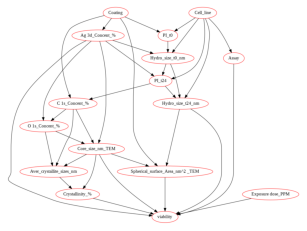

In [ ]:
# now we train again on the unencoded data so we can pass the raw dataframe for inference later

constrained_model = BayesianNetwork().from_samples(
    df_train,
    algorithm=bn_algorithm,
    exclude_edges=excluded_edges,
    include_edges=included_edges,
    state_names=df.columns,
    max_parents=max_parents,
)

test_df = df_test.copy()
df_test.reset_index(drop=True, inplace=True)

test_df["viability"] = None  # configure to predict viability in network
test_df.reset_index(drop=True, inplace=True)

predictions = constrained_model.predict(test_df.values.tolist())

prediction_probabilities = constrained_model.probability(predictions)

predicted_df = pd.DataFrame(predictions)
predicted_df.columns = df.columns
predicted_df["probability"] = prediction_probabilities

y_pred = predicted_df["viability"]
y_true = df_test["viability"]

get_metrics(y_true, y_pred)

constrained_model.plot(f"{path}/BN_structure_constrained.pdf")
constrained_model.plot()

In [ ]:
bn_yaml = constrained_model.to_yaml()

In [ ]:
import yaml
with open("BN.yml", "w") as file:
  yaml.dump(bn_yaml, file)

with open("BN.yml", "r") as file:
  bn_yaml = yaml.full_load(file)

              precision    recall  f1-score   support

       Toxic       0.75      0.69      0.72       427
        safe       0.80      0.79      0.79       492
  very_toxic       0.80      0.87      0.83       427

    accuracy                           0.78      1346
   macro avg       0.78      0.78      0.78      1346
weighted avg       0.78      0.78      0.78      1346


 very_toxic
Acc: 0.8665
Acc (balanced): 0.8665

 safe
Acc: 0.7886
Acc (balanced): 0.7886

 Toxic
Acc: 0.6932
Acc (balanced): 0.6932

MCC: 0.6746025781279282




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



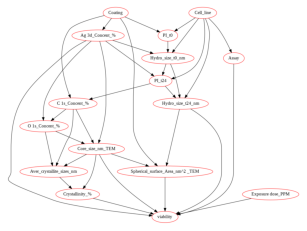

In [ ]:
# GENERATE METRICS FOR TRAIN DATA
model = BayesianNetwork().from_yaml(bn_yaml)

test_df = df_train.copy()
df_train.reset_index(drop=True, inplace=True)

test_df["viability"] = None  # configure to predict viability in network
test_df.reset_index(drop=True, inplace=True)

predictions = model.predict(test_df.values.tolist())

prediction_probabilities = model.probability(predictions)

predicted_df = pd.DataFrame(predictions)
predicted_df.columns = df.columns
predicted_df["probability"] = prediction_probabilities

y_pred = predicted_df["viability"]
y_true = df_train["viability"]

get_metrics(y_true, y_pred)

model.plot(f"{path}/BN_structure_constrained.pdf")
model.plot()

              precision    recall  f1-score   support

       Toxic       0.74      0.70      0.72       105
        safe       0.77      0.76      0.76       112
  very_toxic       0.83      0.89      0.86       119

    accuracy                           0.79       336
   macro avg       0.78      0.78      0.78       336
weighted avg       0.78      0.79      0.78       336


 Toxic
Acc: 0.6952
Acc (balanced): 0.6952

 safe
Acc: 0.7589
Acc (balanced): 0.7589

 very_toxic
Acc: 0.8908
Acc (balanced): 0.8908

MCC: 0.6782187437331546




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



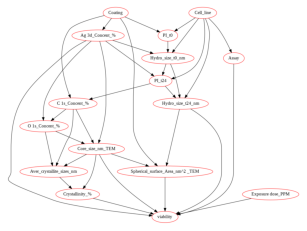

In [ ]:
# GENERATE METRICS FOR TEST DATA
model = BayesianNetwork().from_yaml(bn_yaml)

test_df = df_test.copy()
df_test.reset_index(drop=True, inplace=True)

test_df["viability"] = None  # configure to predict viability in network
test_df.reset_index(drop=True, inplace=True)

predictions = model.predict(test_df.values.tolist())

prediction_probabilities = model.probability(predictions)

predicted_df = pd.DataFrame(predictions)
predicted_df.columns = df.columns
predicted_df["probability"] = prediction_probabilities

y_pred = predicted_df["viability"]
y_true = df_test["viability"]

get_metrics(y_true, y_pred)

In [ ]:
lines = []
with open("BN_rules.txt") as file:
  for line in file.read().splitlines():
    lines.append(line)

lines

['IF (Crystallinity_% = Low (22.9 -> 60.0) ^ Core_size_nm_TEM = Low (7.0 -> 17.8) ^ Spherical_surface_Area_nm^2 _TEM = Medium (3981.5944832 -> 5026.55) ^ Ag 3d_Concent_% = Low (0.08 -> 0.19) ^ Hydro_size_t24_nm = Medium (149.34585899999996 -> 266.90552) ^ Exposure dose_PPM = Medium (20.0 -> 58.353558999999976) ^ Assay = WST-1) THEN (viability = safe)',
 'IF (Crystallinity_% = Low (22.9 -> 60.0) ^ Core_size_nm_TEM = Low (7.0 -> 17.8) ^ Spherical_surface_Area_nm^2 _TEM = Low (3981.53 -> 3981.5944832) ^ Ag 3d_Concent_% = Low (0.08 -> 0.19) ^ Hydro_size_t24_nm = Low (63.744446 -> 149.34585899999996) ^ Exposure dose_PPM = Low (0.0 -> 20.0) ^ Assay = MTT) THEN (viability = safe)',
 'IF (Crystallinity_% = Low (22.9 -> 60.0) ^ Core_size_nm_TEM = Low (7.0 -> 17.8) ^ Spherical_surface_Area_nm^2 _TEM = Medium (3981.5944832 -> 5026.55) ^ Ag 3d_Concent_% = Low (0.08 -> 0.19) ^ Hydro_size_t24_nm = Medium (149.34585899999996 -> 266.90552) ^ Exposure dose_PPM = Low (0.0 -> 20.0) ^ Assay = WST-1) THEN 

In [ ]:
[_.split(" = ") for _ in lines[0].split("IF ")[1][1:-1].split(" ^ ")]

[['Crystallinity_%', 'Low (22.9 -> 60.0)'],
 ['Core_size_nm_TEM', 'Low (7.0 -> 17.8)'],
 ['Spherical_surface_Area_nm^2 _TEM', 'Medium (3981.5944832 -> 5026.55)'],
 ['Ag 3d_Concent_%', 'Low (0.08 -> 0.19)'],
 ['Hydro_size_t24_nm', 'Medium (149.34585899999996 -> 266.90552)'],
 ['Exposure dose_PPM', 'Medium (20.0 -> 58.353558999999976)'],
 ['Assay', 'WST-1) THEN (viability', 'safe']]

# Pipeline 

Work In Progress (WIP)


In [ ]:
class BNProcessor:
  def __init__(self, features, categories):
    self.features = features
    self.categories = categories

  def prepare(self, data, target):
    data = self._validate_input(data)
    if not data:
      return

    data.loc[:, target] = None
    return data

  def encode(self, data):
    data = self._validate_input(data)
    if not data:
      return

    for col, mapping in self.categories:
      pass

    return

  @staticmethod
  def re_map(data, categories):

    col = data.columns
    mapping = categories[col]

    low = all([data >= mapping["Low"], data < mapping["Medium"]])
    medium = all([data >= mapping["Medium"], data < mapping["High"]])
    high = data >= mapping["High"]

    if low:
      next_label = "Medium"
    
    if medium:
      next_label = "High"

    if high:
      next_label = None

    threshold_this = categories[col][label]

    if next_label is not None:
      threshold_next = cats[col][next_label]
      remapped = f"{label} ({threshold_this} -> {threshold_next})"
    
    else:
      remapped = f"{label} (> {threshold_this})"

    return remapped

      

  def _validate_input(self, data):
    try:
      data = data.loc[:, self.features]
    except Exception as e:
      print(e)
      return

    return data

In [ ]:
df.columns

Index(['Coating', 'Crystallinity_%', 'Aver_crystallite_sizes_nm',
       'Core_size_nm_TEM', 'Spherical_surface_Area_nm^2 _TEM',
       'O 1s_Concent_%', 'Ag 3d_Concent_%', 'C 1s_Concent_%',
       'Hydro_size_t0_nm', 'PI_t0', 'Hydro_size_t24_nm', 'PI_t24',
       'Exposure dose_PPM', 'Cell_line', 'Assay', 'viability'],
      dtype='object')

In [ ]:
test_df

,Coating,Crystallinity_%,Aver_crystallite_sizes_nm,Core_size_nm_TEM,Spherical_surface_Area_nm^2 _TEM,O 1s_Concent_%,Ag 3d_Concent_%,C 1s_Concent_%,Hydro_size_t0_nm,PI_t0,Hydro_size_t24_nm,PI_t24,Exposure dose_PPM,Cell_line,Assay,viability
0,HEC,High (> 61.0),High (> 177.0),Low (7.0 -> 17.8),Low (3981.53 -> 3981.5944832),Medium (14.54 -> 34.02),Low (0.08 -> 0.19),Medium (60.61 -> 61.83),Low (55.91 -> 209.97141366666617),Low (0.18 -> 0.47),Low (63.744446 -> 149.34585899999996),Low (0.04 -> 0.2822396666666666),Low (0.0 -> 20.0),A549,MTT,None
1,PVP,Low (22.9 -> 60.0),Medium (98.0 -> 177.0),High (> 20.0),High (> 5026.55),Low (14.16 -> 14.54),High (> 15.53),Low (54.23 -> 60.61),Medium (209.97141366666617 -> 363.31595),Medium (0.47 -> 0.5969939999999999),High (> 266.90552),Medium (0.2822396666666666 -> 0.499763),Low (0.0 -> 20.0),HCT-116,WST-1,None
2,none,Medium (60.0 -> 61.0),Low (46.0 -> 98.0),Medium (17.8 -> 20.0),Medium (3981.5944832 -> 5026.55),Low (14.16 -> 14.54),Medium (0.19 -> 15.53),High (> 61.83),Medium (209.97141366666617 -> 363.31595),High (> 0.5969939999999999),High (> 266.90552),High (> 0.499763),Low (0.0 -> 20.0),HCT-116,WST-1,None
3,none,Medium (60.0 -> 61.0),Low (46.0 -> 98.0),Medium (17.8 -> 20.0),Medium (3981.5944832 -> 5026.55),Low (14.16 -> 14.54),Medium (0.19 -> 15.53),High (> 61.83),High (> 363.31595),High (> 0.5969939999999999),High (> 266.90552),High (> 0.499763),Medium (20.0 -> 58.353558999999976),HCT-116,WST-1,None
4,PVP,Low (22.9 -> 60.0),Medium (98.0 -> 177.0),High (> 20.0),High (> 5026.55),Low (14.16 -> 14.54),High (> 15.53),Low (54.23 -> 60.61),Medium (209.97141366666617 -> 363.31595),Low (0.18 -> 0.47),Medium (149.34585899999996 -> 266.90552),Low (0.04 -> 0.2822396666666666),High (> 58.353558999999976),A549,MTT,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,PVP,Low (22.9 -> 60.0),Medium (98.0 -> 177.0),High (> 20.0),High (> 5026.55),Low (14.16 -> 14.54),High (> 15.53),Low (54.23 -> 60.61),Low (55.91 -> 209.97141366666617),Low (0.18 -> 0.47),Medium (149.34585899999996 -> 266.90552),Low (0.04 -> 0.2822396666666666),Low (0.0 -> 20.0),A549,Alamar_Blue,None
332,PVP,Low (22.9 -> 60.0),Medium (98.0 -> 177.0),High (> 20.0),High (> 5026.55),Low (14.16 -> 14.54),High (> 15.53),Low (54.23 -> 60.61),Medium (209.97141366666617 -> 363.31595),High (> 0.5969939999999999),Medium (149.34585899999996 -> 266.90552),Medium (0.2822396666666666 -> 0.499763),Low (0.0 -> 20.0),HCT-116,WST-1,None
333,none,Medium (60.0 -> 61.0),Low (46.0 -> 98.0),Medium (17.8 -> 20.0),Medium (3981.5944832 -> 5026.55),Low (14.16 -> 14.54),Medium (0.19 -> 15.53),High (> 61.83),High (> 363.31595),Medium (0.47 -> 0.5969939999999999),Medium (149.34585899999996 -> 266.90552),High (> 0.499763),High (> 58.353558999999976),HCT-116,WST-1,None
334,none,Medium (60.0 -> 61.0),Low (46.0 -> 98.0),Medium (17.8 -> 20.0),Medium (3981.5944832 -> 5026.55),Low (14.16 -> 14.54),Medium (0.19 -> 15.53),High (> 61.83),High (> 363.31595),High (> 0.5969939999999999),High (> 266.90552),High (> 0.499763),Medium (20.0 -> 58.353558999999976),HCT-116,WST-1,None


In [ ]:
for col, mapping in cats.items():
  pass

print(col, mapping)

C 1s_Concent_% {'Low': 54.23, 'Medium': 60.61, 'High': 61.83}


In [ ]:
sorted(list(cats[col].values()))

[54.23, 60.61, 61.83]

In [ ]:
print(path)

/content/drive/MyDrive/Irini/NEW


In [ ]:
data_sample = pd.read_csv(f"{path}/data_sample.csv")
data_sample.head()

,NMs,Coating,Crystallinity_%,Aver_crystallite_sizes_nm,Core_size_nm_TEM,Spherical_surface_Area_nm^2 _TEM,Na 1s_Concent_%,O 1s_Concent_%,Ag 3d_Concent_%,C 1s_Concent_%,...,PI_t0,Hydro_size_t24_nm,PI_t24,Exposure dose_PPM,Organ,Cell_line,multiwell,Assay,viability_%,viability
0,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.38,113.96667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,2.99,very_toxic


In [ ]:
v = cats[col]

d = data_sample[col][0]
low = all([d >= v["Low"], d < v["Medium"]])
med = all([d >= v["Medium"], d < v["High"]])
high = d >= v["High"]



In [ ]:
print(low, med, high)

False False True


In [ ]:
def re_map(data, categories):
    # thresholds_low_to_high = sorted(list(self.categories[col].values()))

    mapping = categories[col]

    low = all([data >= mapping["Low"], data < mapping["Medium"]])
    medium = all([data >= mapping["Medium"], data < mapping["High"]])
    high = data >= mapping["High"]

    if low:
      next_label = "Medium"
    
    if medium:
      next_label = "High"

    if high:
      next_label = None

    threshold_this = categories[col][label]

    if next_label is not None:
      threshold_next = cats[col][next_label]
      remapped = f"{label} ({threshold_this} -> {threshold_next})"
    
    else:
      remapped = f"{label} (> {threshold_this})"

    return remapped


In [ ]:
data_sample

,NMs,Coating,Crystallinity_%,Aver_crystallite_sizes_nm,Core_size_nm_TEM,Spherical_surface_Area_nm^2 _TEM,Na 1s_Concent_%,O 1s_Concent_%,Ag 3d_Concent_%,C 1s_Concent_%,...,PI_t0,Hydro_size_t24_nm,PI_t24,Exposure dose_PPM,Organ,Cell_line,multiwell,Assay,viability_%,viability
0,Ag_HEC_6.4_1.4_sol,HEC,59.9,75.0,14.0,3981.5999,0.0,34.02,0.17,64.51,...,0.38,113.96667,0.5,100.0,Lung,A549,MW6,Alamar_Blue,2.99,very_toxic


In [ ]:
data_sample[col].apply(re_map, args=(cats,))

0    High (> 61.83)
Name: C 1s_Concent_%, dtype: object

In [ ]:
processor = BNProcessor(df.columns)

sample = processor.prepare(data_sample, "viability")

TypeError: ignored

In [ ]:
sample

In [ ]:
constrained_model.predict(sample.values.tolist())

NameError: ignored